<a href="https://colab.research.google.com/github/dileep9968/pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# convert MNIST Image into a Tensor Files into a Tensor of 4-Dimensions ( # of images, Height, Width, Channel)
transform = transforms.ToTensor()

In [9]:
# Train data
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)


In [10]:
# Test data
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)


In [11]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [21]:
pwd

'/content'

In [23]:
# create a small size for images let's say 10
train_loader = DataLoader(train_data, batch_size=20, shuffle = True)
test_loader = DataLoader(test_data, batch_size=20, shuffle = False)

In [24]:
# Define our CNN Model
# Describe convolutional layer and wat it's doing (2 cnn)
# This is just an example in the next video
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)


In [28]:
# Grab 1 minist record/image
for i, (x_train,y_train) in enumerate(train_data):
  break

In [29]:
x_train.shape

torch.Size([1, 28, 28])

In [30]:
x = x_train.view(1,1,28,28)

In [31]:
# perform
x = F.relu(conv1(x))

In [33]:
x.shape

torch.Size([1, 6, 26, 26])

In [34]:
# pass thur the pooling layer
x = F.max_pool2d(x,2,2) # kernal of 2 and stride of 2


In [35]:
x.shape

torch.Size([1, 6, 13, 13])

In [36]:
# Do our second convolutional layer
x =F.relu(conv2(x))

In [37]:
x.shape

torch.Size([1, 16, 11, 11])

In [38]:
# pooling layer
x = F.max_pool2d(x,2,2)

In [39]:
x.shape

torch.Size([1, 16, 5, 5])

In [41]:
# Model class
class Convolutional(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2X2 kernal and stride 2

    # Second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # Re-view to flaten it out
    X = X.view(-1,16*5*5) # negative one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.relu(self.fc3(X))

    return F.log_softmax(X,dim=1)


In [42]:
# Create an instence of our model
torch.manual_seed(41)
model = Convolutional()
model

Convolutional(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
# Loss function Optimizer
criterion  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)


In [48]:
import time
state_time = time.time()

# Create Variables to tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loo- of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

#Train
  for b, (x_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()

    trn_corr +=batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if b%600==0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_corr)

  #test
  with torch.no_grad():
    for b, (x_test, y_test) in enumerate(test_loader):
      y_val = model(x_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time -state_time
print(f'Training ime: {total/60} mintues')

Epoch: 0 Batch: 600 Loss: 1.1829028129577637
Epoch: 0 Batch: 1200 Loss: 0.5947456359863281
Epoch: 0 Batch: 1800 Loss: 1.0738856792449951
Epoch: 0 Batch: 2400 Loss: 0.4609503746032715
Epoch: 0 Batch: 3000 Loss: 0.7174612283706665
Epoch: 1 Batch: 600 Loss: 0.34763291478157043
Epoch: 1 Batch: 1200 Loss: 0.8094371557235718
Epoch: 1 Batch: 1800 Loss: 0.585239052772522
Epoch: 1 Batch: 2400 Loss: 0.576702892780304
Epoch: 1 Batch: 3000 Loss: 0.5077216625213623
Epoch: 2 Batch: 600 Loss: 0.4984639286994934
Epoch: 2 Batch: 1200 Loss: 0.46156901121139526
Epoch: 2 Batch: 1800 Loss: 0.34775876998901367
Epoch: 2 Batch: 2400 Loss: 1.3818501234054565
Epoch: 2 Batch: 3000 Loss: 0.9216144680976868
Epoch: 3 Batch: 600 Loss: 0.34646502137184143
Epoch: 3 Batch: 1200 Loss: 0.6949332356452942
Epoch: 3 Batch: 1800 Loss: 0.6497957110404968
Epoch: 3 Batch: 2400 Loss: 1.3821234703063965
Epoch: 3 Batch: 3000 Loss: 0.575720489025116
Epoch: 4 Batch: 600 Loss: 0.6910213232040405
Epoch: 4 Batch: 1200 Loss: 0.461023986

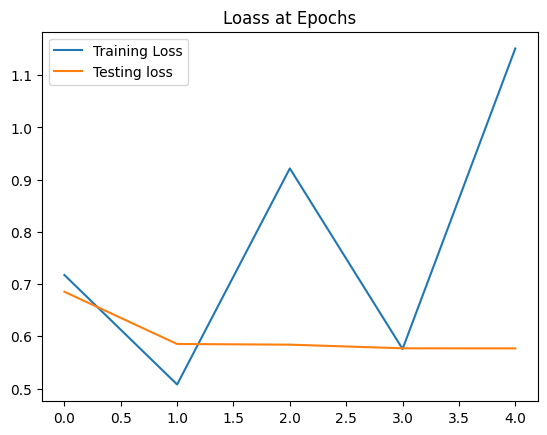

In [49]:
#Graph the loss at epochs
train_losses = [t1.item() for t1 in train_losses]
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Testing loss')
plt.title('Loass at Epochs')
plt.legend()

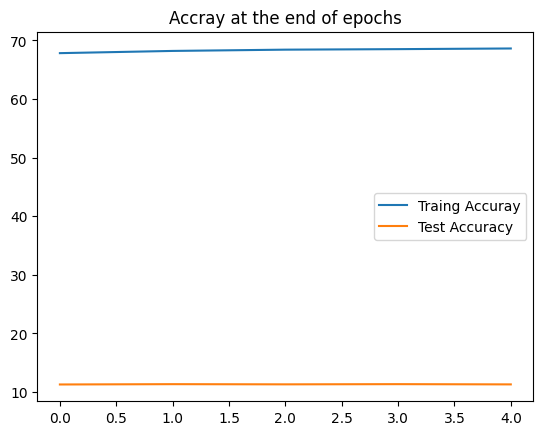

In [50]:
#
plt.plot([t/600 for t in train_correct ], label='Traing Accuray')
plt.plot([t/600 for t in test_correct], label = 'Test Accuracy')
plt.title('Accray at the end of epochs')
plt.legend()

In [51]:
test_load_everything = DataLoader(test_data,batch_size=10000,shuffle=False )

In [53]:
with torch.no_grad():
  correct = 0
  for x_test, y_test in test_load_everything:
    y_val = model(x_test)
    predicated = torch.max(y_val, 1)[1]
    correct += (predicated == y_test).sum()


In [54]:
correct.item()/len(test_data)*100

67.74